# Sports Sales Analysis
<div style="text-align: center;">
  <img src="https://github.com/dinamohsin/Sports-Sales-Analysis/blob/main/img/logo_py.png?raw=true" width="200" style="float: right; margin-left: 20px; margin-top: 0px;">
</div>

## Project Goal  
The main objective of this project is to analyze **Sports Product Sales** data to extract insights related to profitability, pricing, and sales performance. 


The goal is to answer specific business questions like:  
- **How are sales distributed across regions and sales methods?**  
- **What are the trends in sales and profit over time?**  
- **How do product prices vary and impact sales?**


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
# Load the sales data from the provided URL (Excel file)
url = "https://raw.githubusercontent.com/dinamohsin/Sports-Sales-Analysis/main/Data/Sport-Products-Sales-Analysis.xlsx"
df = pd.read_excel(url, engine='openpyxl')

### Data Exploration & Column Summary

In [75]:
# Display first few rows
print("First 5 rows of data:")
df.head()

First 5 rows of data:


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Proft,Operating Margin,Sales Method
0,Amazon,1185732,2021-10-12,South,Alabama,Birmingham,Men's Street Footwear,40.0,450,18000.0,6300.0,0.35,Outlet
1,Amazon,1185732,2021-10-13,South,Alabama,Birmingham,Men's Athletic Footwear,40.0,250,10000.0,3500.0,0.35,Outlet
2,Amazon,1185732,2021-10-14,South,Alabama,Birmingham,Women's Street Footwear,30.0,250,7500.0,3000.0,0.40,Outlet
3,Amazon,1185732,2021-10-15,South,Alabama,Birmingham,Women's Athletic Footwear,35.0,100,3500.0,1050.0,0.30,Outlet
4,Amazon,1185732,2021-10-16,Northeast,Maine,Portland,Men's Apparel,50.0,150,7500.0,1875.0,0.25,Outlet


In [76]:
def data_type_summary(df):
    # Numerical Columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_numerical = len(numerical_cols)

    # Categorical Columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    num_categorical = len(categorical_cols)

    # Summary Output
    print("--- Column Type Summary ---")
    print(f"Number of Numerical Columns: {num_numerical}")
    print(f"Numerical Columns: {list(numerical_cols)}")

    print(f"\nNumber of Categorical Columns: {num_categorical}")
    print(f"Categorical Columns: {list(categorical_cols)}")

# Display summary of column types
data_type_summary(df)

--- Column Type Summary ---
Number of Numerical Columns: 6
Numerical Columns: ['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Proft', 'Operating Margin']

Number of Categorical Columns: 6
Categorical Columns: ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']


In [77]:
# Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(" --- Categorical Columns Analysis ---\n")

for col in categorical_cols:
    unique_vals = df[col].unique()
    num_unique = df[col].nunique()
    
    print(f"Column: {col}")
    print(f"Number of Unique Values: {num_unique}")
    print(f"Unique Values: {list(unique_vals)}\n")

 --- Categorical Columns Analysis ---

Column: Retailer
Number of Unique Values: 6
Unique Values: ['Amazon', 'Foot Locker', "Kohl's", 'Sports Direct', 'Walmart', 'West Gear']

Column: Region
Number of Unique Values: 5
Unique Values: ['South', 'Northeast', 'West', 'Southeast', 'Midwest']

Column: State
Number of Unique Values: 50
Unique Values: ['Alabama', 'Maine', 'Alaska', 'North Carolina', 'Ohio', 'Kentucky', 'Massachusetts', 'Vermont', 'New Hampshire', 'New York', 'California', 'Illinois', 'Texas', 'Pennsylvania', 'Washington', 'Florida', 'Minnesota', 'Tennessee', 'Nebraska', 'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Louisiana', 'Idaho', 'Arizona', 'Georgia', 'South Carolina', 'Mississippi', 'Kansas', 'South Dakota', 'North Dakota', 'Iowa', 'West Virginia', 'Maryland', 'Delaware', 'Connecticut', 'Rhode Island', 'Montana', 'New Mexico', 'Oklahoma', 'New Jersey', 'Arkansas', 'Nevada', 'Colorado', 'Utah', 'Oregon', 'Wisconsin', 'Indiana']

Column: City
Number of Unique 

### Data Cleaning and Transformation

In [78]:
# Convert 'Invoice Date' to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Convert the 'Retailer ID' column to string type
df['Retailer ID'] = df['Retailer ID'].astype(str) 

# Rename 'Operating Proft' column to 'Operating Profit'
df = df.rename(columns={'Operating Proft': 'Operating Profit'})

In [79]:
# --- Extracting year and quarter from invoice date --- 
df['Year'] = df['Invoice Date'].dt.year
df['QuarterNum'] = df['Invoice Date'].dt.quarter
df['Quarter'] = 'Q' + df['QuarterNum'].astype(str)

In [80]:
# --- Creating a new column combining year and quarter --- 
df['Year_Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']

### Verifying Data After Transformations

In [81]:
# Display data type summary after transformations
data_type_summary(df)

--- Column Type Summary ---
Number of Numerical Columns: 5
Numerical Columns: ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

Number of Categorical Columns: 9
Categorical Columns: ['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Sales Method', 'Quarter', 'Year_Quarter']


In [82]:
# Show the first 5 rows of data after the applied transformations
print("First 5 rows of data after changes:")
df.head()

First 5 rows of data after changes:


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,QuarterNum,Quarter,Year_Quarter
0,Amazon,1185732,2021-10-12,South,Alabama,Birmingham,Men's Street Footwear,40.0,450,18000.0,6300.0,0.35,Outlet,2021,4,Q4,2021-Q4
1,Amazon,1185732,2021-10-13,South,Alabama,Birmingham,Men's Athletic Footwear,40.0,250,10000.0,3500.0,0.35,Outlet,2021,4,Q4,2021-Q4
2,Amazon,1185732,2021-10-14,South,Alabama,Birmingham,Women's Street Footwear,30.0,250,7500.0,3000.0,0.40,Outlet,2021,4,Q4,2021-Q4
3,Amazon,1185732,2021-10-15,South,Alabama,Birmingham,Women's Athletic Footwear,35.0,100,3500.0,1050.0,0.30,Outlet,2021,4,Q4,2021-Q4
4,Amazon,1185732,2021-10-16,Northeast,Maine,Portland,Men's Apparel,50.0,150,7500.0,1875.0,0.25,Outlet,2021,4,Q4,2021-Q4


### Data Overview and Descriptive Statistics

In [83]:
# Basic Info
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9644 non-null   object        
 1   Retailer ID       9644 non-null   object        
 2   Invoice Date      9644 non-null   datetime64[ns]
 3   Region            9644 non-null   object        
 4   State             9644 non-null   object        
 5   City              9644 non-null   object        
 6   Product           9644 non-null   object        
 7   Price per Unit    9644 non-null   float64       
 8   Units Sold        9644 non-null   int64         
 9   Total Sales       9644 non-null   float64       
 10  Operating Profit  9644 non-null   float64       
 11  Operating Margin  9644 non-null   float64       
 12  Sales Method      9644 non-null   object        
 13  Year              9644 non-null   int32         
 14  QuarterNum   

In [84]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
QuarterNum          0
Quarter             0
Year_Quarter        0
dtype: int64

In [85]:
# Summary statistics for all numeric columns (excluding 'Invoice Date', 'Year', and 'QuarterNum'), rounded to 2 decimal places
print("Summary statistics:")
df.drop(columns=['Invoice Date', 'Year', 'QuarterNum']).describe().round(2)


Summary statistics:


,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9644.00,9644.00,9644.00,9644.00,9644.00
mean,45.22,257.04,9331.21,3443.95,0.42
std,14.71,214.23,14193.27,5419.98,0.10
min,7.00,6.00,16.00,7.52,0.10
25%,35.00,106.00,426.12,192.48,0.35
50%,45.00,176.00,958.10,437.44,0.41
75%,55.00,350.00,15000.00,5206.25,0.49
max,110.00,1275.00,82500.00,39000.00,0.80


### Key Performance Indicators (KPIs)

In [86]:
# Calculate Key Performance Indicators (KPIs) for the dataset
# Total Sales, Total Profit, Total Units Sold, and Number of Product Records

total_sales = df['Total Sales'].sum()
total_profit = df['Operating Profit'].sum()
total_units_sold = df['Units Sold'].sum()
total_products = df['Product'].count()

print("--- KPI Summary ---")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Units Sold: {total_units_sold:,}")
print(f"Number of Product Records: {total_products:,}")

avg_sales = df['Total Sales'].mean()
avg_profit = df['Operating Profit'].mean()
avg_units = df['Units Sold'].mean()
avg_price = df['Price per Unit'].mean()
avg_margin = df['Operating Margin'].mean()

print("\n--- KPI Averages ---")
print(f"Average Sales: ${avg_sales:,.2f}")
print(f"Average Profit: ${avg_profit:,.2f}")
print(f"Average Units Sold: {avg_units:.2f}")
print(f"Average Price per Unit: ${avg_price:.2f}")
print(f"Average Margin: {avg_margin:.2%}")

--- KPI Summary ---
Total Sales: $89,990,212.50
Total Profit: $33,213,476.14
Total Units Sold: 2,478,861
Number of Product Records: 9,644

--- KPI Averages ---
Average Sales: $9,331.21
Average Profit: $3,443.95
Average Units Sold: 257.04
Average Price per Unit: $45.22
Average Margin: 42.30%


### Custom Number Formatting for Visualizations

In [87]:
from matplotlib.ticker import FuncFormatter

# --- Custom formatter to display values in millions, thousands, or as is --- 
def custom_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'  # For millions
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'  # For thousands
    else:
        return f'{x:.0f}'  # For values less than 1,000

### Total Sales Analysis by Product

#### Question 1:
**Which product had the highest total sales, and which one had the lowest?**

**Answer:**
- **Highest Sales**: *Men's Street Footwear* with **$20,882,624**
- **Lowest Sales**: *Women's Athletic Footwear* with **$10,663,189**

In [88]:
# Total Sales by Product
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("Total Sales by Product:")
sales_by_product

Total Sales by Product:


Product
Men's Street Footwear        20882624.4
Women's Apparel              17903886.0
Men's Athletic Footwear      15367368.0
Women's Street Footwear      12800281.3
Men's Apparel                12372863.2
Women's Athletic Footwear    10663189.6
Name: Total Sales, dtype: float64

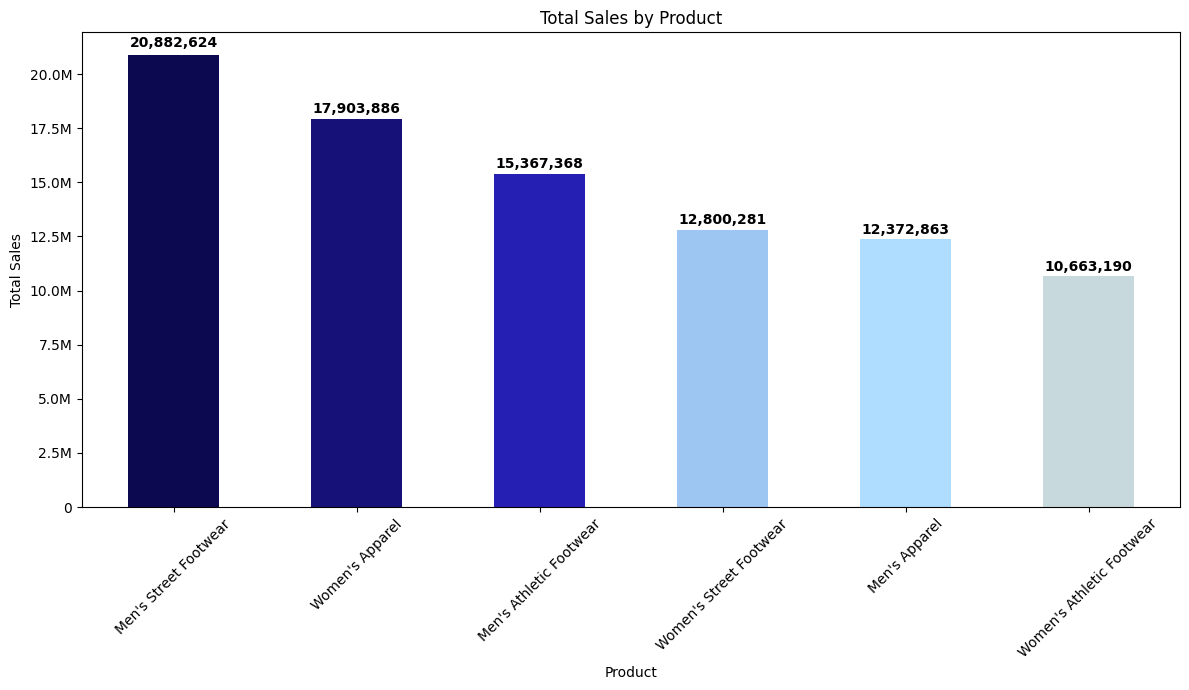

In [89]:
# Bar chart: Total Sales by Product
plt.figure(figsize=(12, 7))
ax = sales_by_product.plot(kind='bar', color=['#0C0950', '#161179', '#261FB3', '#9EC6F3', '#AFDDFF', '#C7D9DD'])

plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Apply custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))

# --- Add value labels on top of each bar ---
for index, sales in enumerate(sales_by_product):
    ax.text(index, sales + (sales * 0.01), f'{sales:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


### Total Sales by Region

#### Question 2:
**Which region had the highest total sales, and which region had the lowest?**

**Answer:**
- **Highest Sales**: *West* with **$26,994,318**
- **Lowest Sales**: *Midwest* with **$13,580,045**


In [90]:
# Total Sales by Region
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print("Total Sales by Region:")
sales_by_region

Total Sales by Region:


Region
West         26994318.2
Northeast    18632406.7
Southeast    16317123.6
South        14466318.1
Midwest      13580045.9
Name: Total Sales, dtype: float64

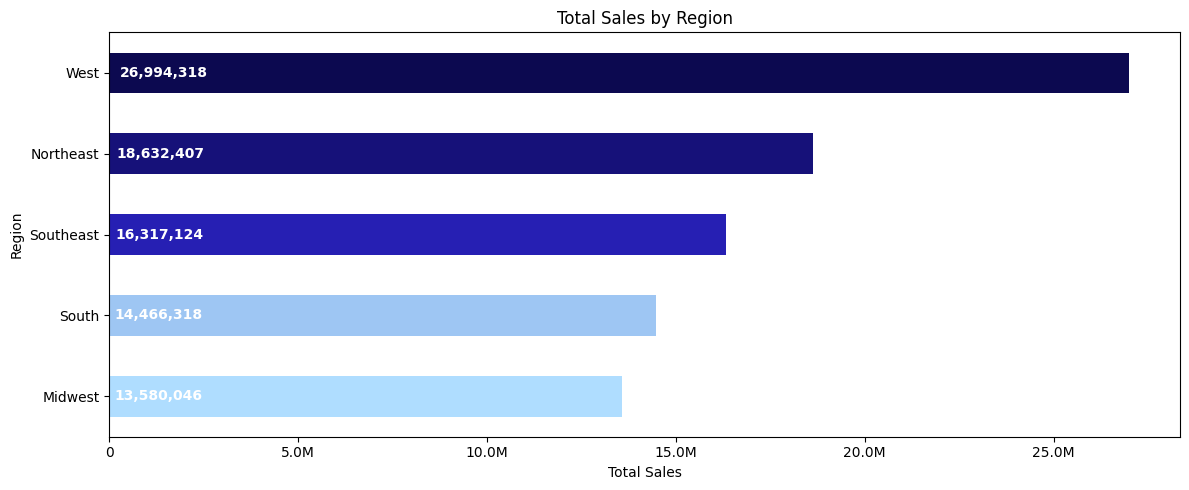

In [91]:
# Horizontal Bar chart: Total Sales by Region
plt.figure(figsize=(12, 5))  
ax = sales_by_region.plot(kind='barh', color=['#0C0950','#161179','#261FB3','#9EC6F3','#AFDDFF','#C7D9DD'])

plt.title('Total Sales by Region')
plt.xlabel('Total Sales')

# Reverse y-axis so largest value is on top
plt.gca().invert_yaxis()

# Apply custom formatter for x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(custom_formatter))

# Add value labels inside the bars
for index, sales in enumerate(sales_by_region):
    ax.text(sales * 0.01, index, f'{sales:,.0f}', va='center', ha='left', fontsize=10, fontweight='bold', color='white')

plt.tight_layout()
plt.show()


### Total Sales by Region and Quarter

#### Question 3:
**How did the sales performance of different regions compare across the quarters in 2021?**

**Answer:**

| Quarter | Best Performing Region | Lowest Performing Region |
|---------|------------------------|--------------------------|
| Q1 2021 | West                   | South                    |
| Q2 2021 | West                   | Midwest                  |
| Q3 2021 | South                  | Northwest                |
| Q4 2021 | Northwest              | Midwest                  |

#### Question 4:
**How did the overall sales in 2021 compare to 2020?**

**Answer:**
total sales increased significantly in 2021 compared to 2020.



In [92]:
# --- Grouping data by region and year/quarter, and summing total sales --- 
sales_by_quarter = df.groupby(['Region', 'Year_Quarter'])['Total Sales'].sum().reset_index()
print("Total Sales by Region and Year_Quarter:")
sales_by_quarter

Total Sales by Region and Year_Quarter:


,Region,Year_Quarter,Total Sales
0,Midwest,2020-Q4,737806.8
1,Midwest,2021-Q1,3120449.1
2,Midwest,2021-Q2,2897790.7
3,Midwest,2021-Q3,3936899.5
4,Midwest,2021-Q4,2887099.8
5,Northeast,2020-Q1,2595704.2
6,Northeast,2020-Q2,1297596.5
7,Northeast,2020-Q3,181670.2
8,Northeast,2021-Q1,2287102.4
9,Northeast,2021-Q2,3073628.8


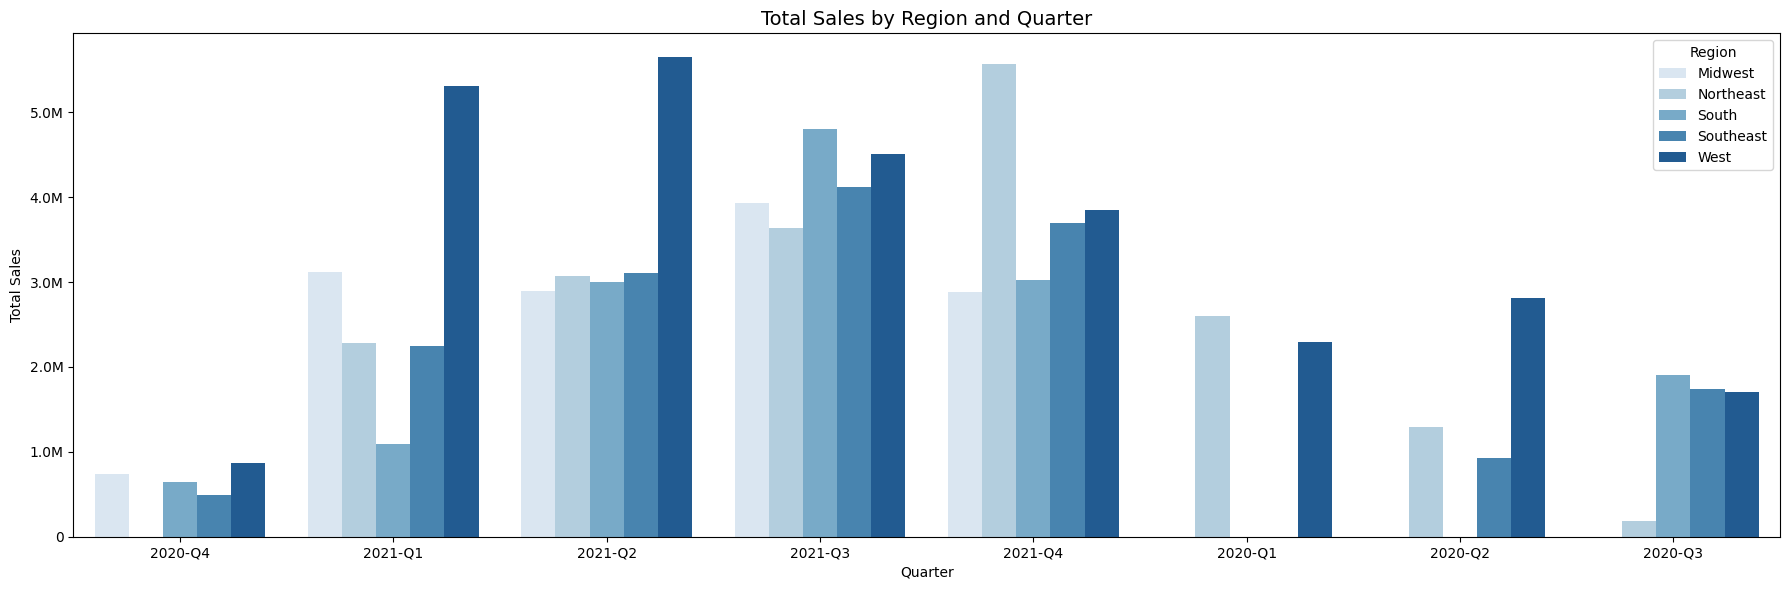

In [93]:
# : Total Sales by Region and Quarter
plt.figure(figsize=(18, 6))
sns.barplot(
    data=sales_by_quarter,
    x='Year_Quarter',
    y='Total Sales',
    hue='Region',
    palette='Blues'
    #palette=['#0C0950','#161179','#261FB3','#9EC6F3','#AFDDFF','#C7D9DD']
    
)

# Apply custom y-axis formatter to show values in millions, thousands ..
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))

# --- Adding final details like title and axis labels --- 
plt.title('Total Sales by Region and Quarter', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Total Sales by Region

#### Question 5:
**Which region had the highest share of total sales, and how did the other regions compare?**

**Answer:**
- The region with the highest share of total sales was **West**, accounting for **30.0%** of total sales.
- It was followed by:
  - **Northeast**: **20.7%**
  - **Southeast**: **18.1%**
  - **South**: **16.1%**
  - **Midwest**: **15.1%**


In [94]:
sales_percentage_by_region = (sales_by_region / sales_by_region.sum()) * 100
sales_percentage_by_region = sales_percentage_by_region.round(2)  # Round to 1 decimal place

print("Total Sales by Region percentage:\n")
# Display results as text
for region, percentage in sales_percentage_by_region.items():
    print(f"{region}: {percentage}%")


Total Sales by Region percentage:

West: 30.0%
Northeast: 20.7%
Southeast: 18.13%
South: 16.08%
Midwest: 15.09%


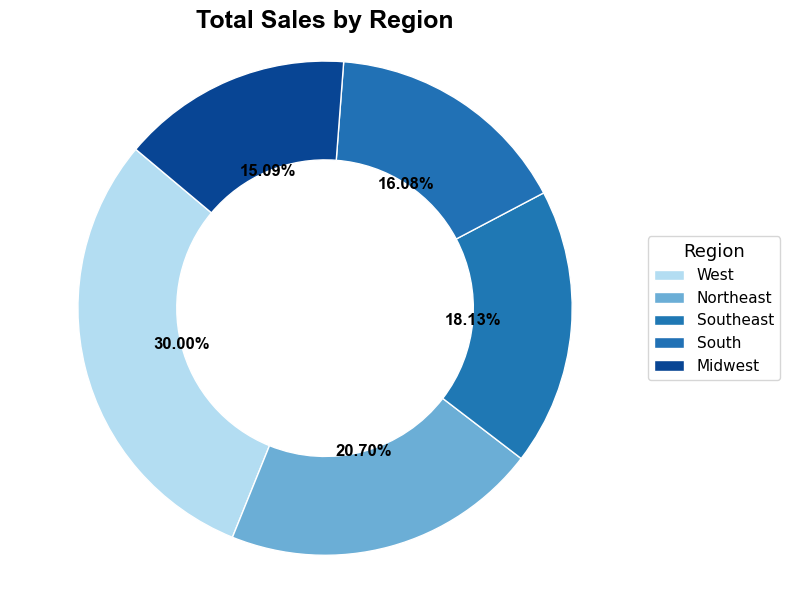

In [95]:
# Donut Chart: Total Sales by Region
fig, ax = plt.subplots(figsize=(8, 6))

# Custom blue color palette with more distinct shades
blue_palette = ['#B3DDF2', '#6BAED6', '#1F78B4', '#2171B5', '#084594', '#08306B']

# --- Plotting the pie chart as a donut with percentage labels ---
wedges, texts, autotexts = ax.pie(
    sales_by_region,
    colors=blue_palette[:len(sales_by_region)],
    autopct='%1.2f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),
    textprops={'fontsize': 12, 'color': 'white', 'fontweight': 'bold'}
)

# --- Styling the percentage labels inside the chart ---
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('#000000')       
    autotext.set_fontweight('bold')      
    autotext.set_fontname('Arial')       

# --- Adding title and legend ---
ax.legend(
    labels=sales_by_region.index,
    title='Region',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=11,
    title_fontsize=13
)

plt.title('Total Sales by Region', fontsize=18, fontweight='bold', fontname='Arial')
plt.axis('equal')        # Ensures the pie is a perfect circle
plt.tight_layout()       
plt.show()


### Visualizing Sales Method Distribution with a Donut Chart

In [96]:
def plot_sales_method_distribution(data):
    # Color palette with shades of blue
    blue_palette = ['#A6CEE3', '#1F78B4', '#6BAED6', '#2171B5', '#08306B']
    # Plotting Total Sales by Sales Method
    fig, ax = plt.subplots(figsize=(8, 6))

    wedges, texts, autotexts = ax.pie(
        data,  # No need to access 'Total Sales' again
        colors=blue_palette[:len(data)],
        autopct='%1.2f%%',
        startangle=140,
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),  # Adding border to wedges for clarity
        textprops={'fontsize': 10, 'color': 'white'}  # Text properties
    )

    # --- Styling the percentage labels inside the chart ---
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('#000000')       
        autotext.set_fontweight('bold')      
        autotext.set_fontname('Arial')       

    # Add title and legend
    ax.legend(
        labels=data.index,
        title='Sales Method',
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=10,
        title_fontsize=12
    )

In [97]:
def finalize_and_show_plot():
    plt.axis('equal') 
    plt.tight_layout()  
    plt.show()

### Total Sales by Sales Method

#### Question 6:
**How were total sales distributed across different sales methods?**

**Answer:**
- **In-Store** sales accounted for the largest share at **39.6%**.
- **Outlet** sales followed with **32.8%**.
- **Online** sales made up **27.5%** of total sales.

In [98]:
# Grouping by 'Sales Method' and summing 'Total Sales'
sales_method_by_total_sales = df.groupby('Sales Method')['Total Sales'].sum()
print("Total Sales by Sales Method:\n")
sales_method_by_total_sales

Total Sales by Sales Method:



Sales Method
In-store    35664375.0
Online      24767288.2
Outlet      29558549.3
Name: Total Sales, dtype: float64

In [99]:
# Calculate the percentage of Total Sales for each Sales Method
method_sales_percentage = (sales_method_by_total_sales / sales_method_by_total_sales.sum()) * 100
method_sales_percentage = method_sales_percentage.round(2)  # Round to 1 decimal place

print("Total Sales by Sales Method percentage:\n")
# Display the results as text
for method, percentage in method_sales_percentage.items():
    print(f"{method}: {percentage}%")


Total Sales by Sales Method percentage:

In-store: 39.63%
Online: 27.52%
Outlet: 32.85%


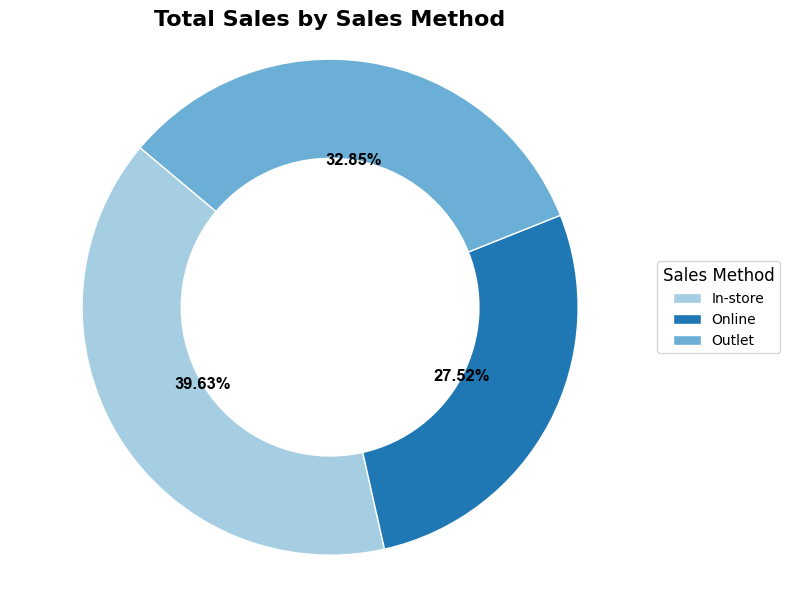

In [100]:
plot_sales_method_distribution(sales_method_by_total_sales)
plt.title('Total Sales by Sales Method', fontsize=16, fontweight='bold')
finalize_and_show_plot()

### Units Sold by Sales Method

#### Question 7:
**How were units sold distributed across different sales methods?**

**Answer:**
- **Online** sales accounted for **37.9%** of total units sold.
- **Outlet** sales represented **34.3%**.
- **In-Store** sales made up **27.8%**.

In [101]:
# Group by Sales Method and sum Units Sold
units_sold_by_method = df.groupby('Sales Method')['Units Sold'].sum()
print("Units Sold by Sales Method:\n")
units_sold_by_method

Units Sold by Sales Method:



Sales Method
In-store    689990
Online      939093
Outlet      849778
Name: Units Sold, dtype: int64

In [102]:
# Calculate percentage
units_sold_percentages = (units_sold_by_method / units_sold_by_method.sum()) * 100
units_sold_percentages = units_sold_percentages.round(1)

print("Units Sold by Sales Method percentage:\n")
# Display the results
for method, percentage in units_sold_percentages.items():
    print(f"{method}: {percentage}%")

Units Sold by Sales Method percentage:

In-store: 27.8%
Online: 37.9%
Outlet: 34.3%


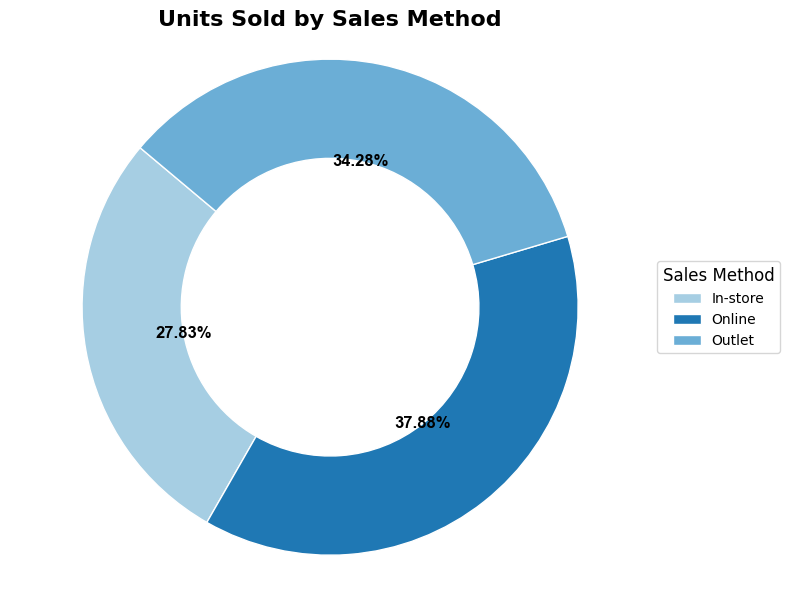

In [103]:
plot_sales_method_distribution(units_sold_by_method)
plt.title('Units Sold by Sales Method', fontsize=16, fontweight='bold')
finalize_and_show_plot()

### Profit by Sales Method

#### Question 8:
**How was operating profit distributed across different sales methods?**

**Answer:**
- **In-Store** generated the highest share of operating profit at **38.4%**.
- **Outlet** followed with **32.5%**.
- **Online** accounted for **29.1%** of the total operating profit.

This indicates that the **Outlet** method was the most profitable overall, despite **Online** having the highest share in units sold.


In [104]:
# Group by Sales Method and sum Operating Profit
operating_profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()
operating_profit_by_method


# Multiply the numbers by 1 million to convert to millions
operating_profit_by_method_millions = operating_profit_by_method / 1_000_000

print("Total Profit by Sales Method:\n")
# Display the results with formatting
for method, profit in operating_profit_by_method_millions.items():
    print(f"{method}: {profit:.2f}M")


Total Profit by Sales Method:

In-store: 12.76M
Online: 9.66M
Outlet: 10.80M


In [105]:
# Calculate percentage
operating_profit_percentages = (operating_profit_by_method / operating_profit_by_method.sum()) * 100
operating_profit_percentages = operating_profit_percentages.round(1)  # Round to 1 decimal place

print("Total Profit by Sales Method percentage:\n")
# Display the results
for method, percentage in operating_profit_percentages.items():
    print(f"{method}: {percentage}%")


Total Profit by Sales Method percentage:

In-store: 38.4%
Online: 29.1%
Outlet: 32.5%


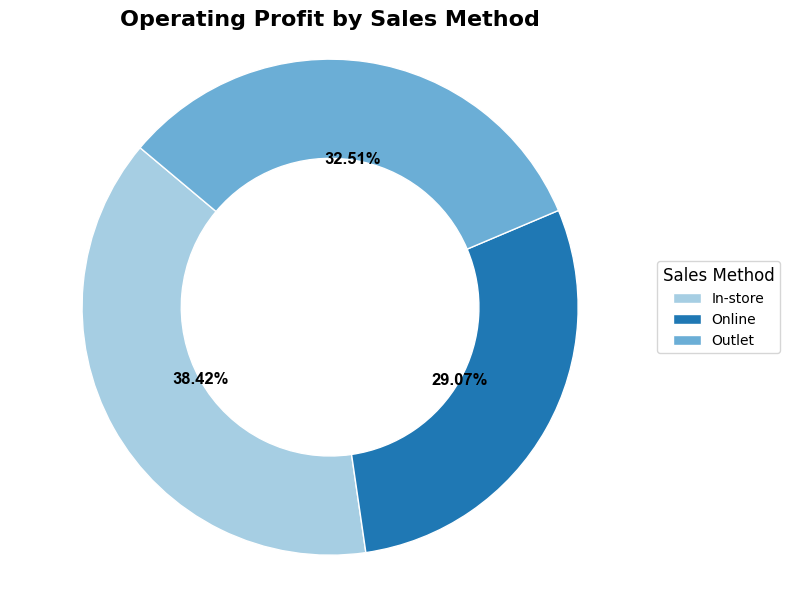

In [106]:
plot_sales_method_distribution(operating_profit_by_method)
plt.title('Operating Profit by Sales Method', fontsize=16, fontweight='bold')
finalize_and_show_plot()